# Phân tích FPT: Dữ liệu giá, chỉ số tài chính và bối cảnh doanh nghiệp

**Phạm vi dữ liệu sử dụng trong bài**  
- **Giá cổ phiếu**: 15/03/2021 → 14/03/2025  
- **Chỉ số tài chính theo quý**: Q1/2015 → Q4/2024

**Mục tiêu**  
1) Mô tả dữ liệu và thống kê “five number summary” cho hai bảng.  
2) Vẽ chuỗi thời gian **giá đóng cửa theo ngày**.  
3) Tạo **bảng dữ liệu theo quý** bằng cách lấy **giá đóng cửa trung bình trong cửa sổ ±14 ngày** quanh ngày **cuối quý**, sau đó tính **price_change** và **pct_change** theo quý.  
4) Phân tích **tương quan Pearson** giữa các chỉ số tài chính và giá.  
5) Trình bày **bối cảnh doanh nghiệp FPT** trong giai đoạn dữ liệu để kết nối số liệu với thực tế hoạt động.

> Ghi chú: Bài chỉ sử dụng dữ liệu trong phạm vi nêu trên. Khi diễn giải, tránh suy rộng ra ngoài giai đoạn dữ liệu.


In [32]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [33]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('./FPT/Simplize_FPT_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,38801.345107,39257.235584,38548.072619,38750.690609,NaN,NaN,1801400
2021-03-16,39003.963097,41283.415486,38801.345107,41030.142998,NaN,NaN,5171000
2021-03-17,41283.415486,41283.415486,40523.598023,40928.834003,NaN,NaN,2573500
2021-03-18,41030.142998,41030.142998,40523.598023,41030.142998,NaN,NaN,2177500
2021-03-19,40523.598023,40776.870510,40219.671037,40422.289028,NaN,NaN,2923500


In [34]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('./FPT/Simplize_FPT_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,6.478973e+12,2.086993e+12,26.886181,1418.691415,0.0424,0.2866,1.0117,1.988404,0.252270,20300.156504
Q3/2024,6.158956e+12,2.088852e+12,27.016817,1419.955116,0.0368,0.2816,0.9110,2.097673,0.239378,20184.500524
Q2/2024,5.651357e+12,1.875159e+12,24.724594,1283.961280,0.0804,0.2796,0.9943,2.005734,0.239496,18820.482952
Q1/2024,5.510466e+12,1.798031e+12,20.588714,1231.150155,0.0469,0.2770,0.9549,2.047182,0.230371,18374.065310
Q4/2023,5.631864e+12,1.728400e+12,19.319241,1360.978206,0.1046,0.2819,1.0143,1.985892,0.239965,19677.773956


## Mô tả dữ liệu

**Bảng lịch sử giá**  
- Tần suất ngày, có cột **NGÀY** và các cột giá như **GIÁ ĐÓNG CỬA**.  
- Phạm vi: **15/03/2021 → 14/03/2025**. Dữ liệu đủ dài để thấy các chu kỳ tăng giảm trung hạn.

**Bảng chỉ số tài chính**  
- Cấu trúc theo **quý**. Các cột có dạng **Q4/2024, Q3/2024, …**  
- Các chỉ số điển hình: biên lợi nhuận gộp, biên lợi nhuận ròng, P/E, EPS, tăng trưởng EPS, ROE (LTM), D/E, khả năng thanh toán tổng quát, vòng quay tài sản, giá trị sổ sách trên mỗi cổ phiếu.  
- Vì dữ liệu tài chính theo quý thường công bố có độ trễ, việc so khớp với giá sẽ dùng **cửa sổ ±14 ngày** quanh **ngày cuối quý** để lấy trung bình giá, giảm nhiễu do chênh ngày công bố.

**Tiền xử lý chính**  
- Chuẩn hóa tên cột, ép kiểu ngày tháng, sắp xếp thời gian tăng dần.  
- Kiểm tra giá trị thiếu, loại bỏ dòng rỗng theo nhu cầu.


In [35]:
def five_number_summary(s):
    s = s.dropna()
    q = s.quantile([0.25, 0.5, 0.75])
    return pd.Series({
        "min": s.min(),
        "Q1": q.loc[0.25],
        "median": q.loc[0.5],
        "Q3": q.loc[0.75],
        "max": s.max(),
        "mean": s.mean(),
        "std": s.std(ddof=1),
        "variance": s.var(ddof=1),
    })

price_stats = five_number_summary(df_price['GIÁ ĐÓNG CỬA'])
display(price_stats.to_frame("Price history").T)

,min,Q1,median,Q3,max,mean,std,variance
Price history,38548.072619,56368.356081,62028.027419,95584.497289,154300.0,78715.399444,32045.577269,1.026919e+09


In [36]:
# Bảng Chỉ số tài chính: áp dụng cho toàn bộ cột số
fin_stats = df_financials.select_dtypes("number").apply(five_number_summary, axis=0).T
display(fin_stats.head(10))


,min,Q1,median,Q3,max,mean,std,variance
CHỈ TIÊU,,,,,,,,
Lợi nhuận gộp,1.686151e+12,2.263643e+12,2.818775e+12,4.160648e+12,6.478973e+12,3.310457e+12,1.378233e+12,1.899526e+24
Lợi nhuận sau thuế của Cổ đông công ty mẹ,3.456900e+11,5.913719e+11,8.924266e+11,1.368612e+12,2.088852e+12,1.002123e+12,5.032327e+11,2.532431e+23
P/E,8.104256e+00,1.044149e+01,1.216248e+01,1.872762e+01,2.701682e+01,1.459267e+01,5.244596e+00,2.750578e+01
EPS (VNĐ/CP),7.525728e+02,1.055957e+03,1.171640e+03,1.294257e+03,2.660838e+03,1.202676e+03,3.054933e+02,9.332616e+04
Tăng trưởng EPS,-5.207000e-01,-2.657500e-02,4.090000e-02,7.830000e-02,8.579000e-01,3.000750e-02,1.937636e-01,3.754435e-02
ROE LTM,2.281000e-01,2.439500e-01,2.579500e-01,2.781000e-01,2.891000e-01,2.595850e-01,1.945680e-02,3.785669e-04
Nợ phải trả / Vốn chủ sở hữu,7.994000e-01,9.851750e-01,1.151600e+00,1.338700e+00,1.612900e+00,1.164375e+00,2.232024e-01,4.981932e-02
Khả năng thanh toán tổng quát,1.620003e+00,1.753828e+00,1.869156e+00,2.015019e+00,2.250988e+00,1.893419e+00,1.686994e-01,2.845950e-02
Vòng quay tài sản (vòng),1.759685e-01,2.038175e-01,2.306361e-01,3.393252e-01,4.567245e-01,2.668973e-01,8.550935e-02,7.311849e-03


### Nhận xét nhanh về thống kê mô tả

- **Five number summary** giúp hình dung phân bố cơ bản của chuỗi giá và các chỉ số tài chính.  
- Chú ý độ **chênh lệch giữa Q1 và Q3** của giá. Khoảng này lớn thể hiện mức biến động trung vị theo giai đoạn.  
- Nếu có **outlier** ở hai đầu phân vị, cần kiểm tra lại nguồn dữ liệu hoặc bối cảnh sự kiện.  
- Với các chỉ số tài chính, độ lệch chuẩn cao có thể phản ánh tính chu kỳ hoặc thay đổi chính sách kế toán.  
- Các chỉ số có đơn vị khác nhau sẽ được chuẩn hóa khi tính tương quan để đảm bảo so sánh hợp lý.


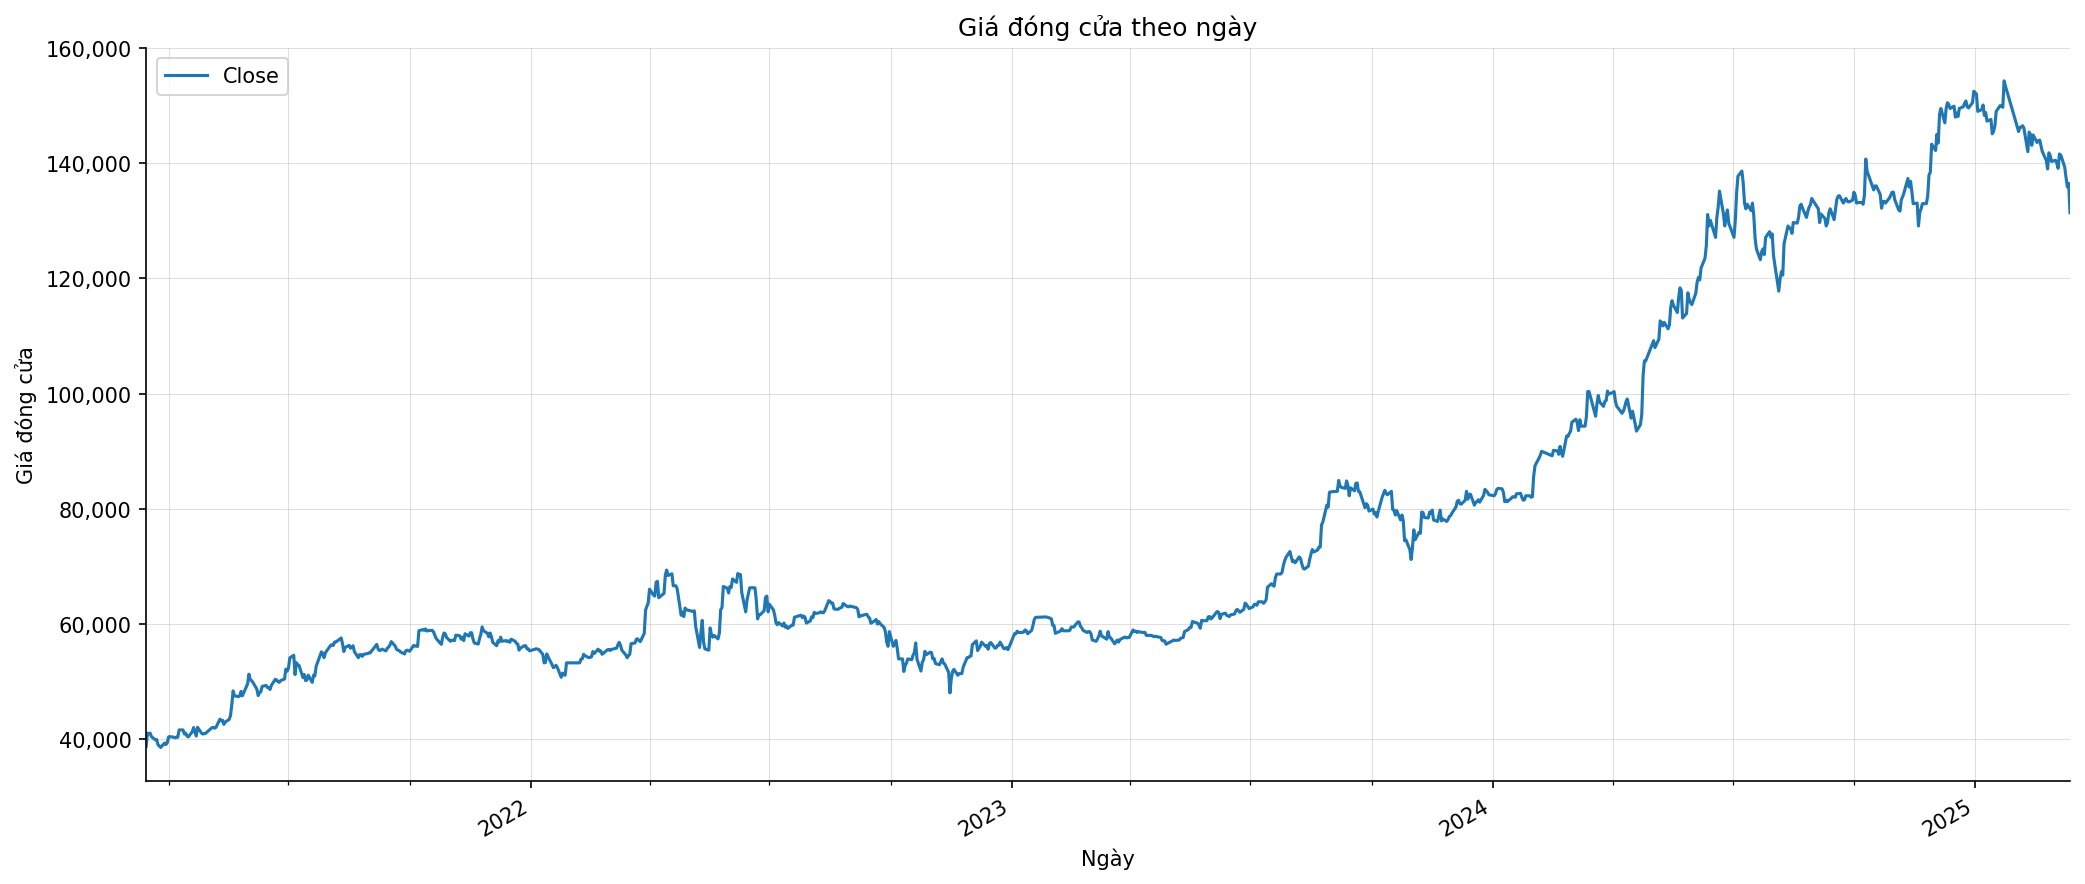

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


fig, ax = plt.subplots(figsize=(14, 6), dpi=150)
ax.plot(df_price.index, df_price['GIÁ ĐÓNG CỬA'], label='Close')

ax.set_title('Giá đóng cửa theo ngày')
ax.set_xlabel('Ngày'); ax.set_ylabel('Giá đóng cửa')

ax.grid(True, which='both', linewidth=0.5, alpha=0.4)

# Mốc thời gian: chính theo năm, phụ theo quý
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,4,7,10)))
fig.autofmt_xdate()

# Định dạng số có dấu phẩy nghìn
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))

# Tối giản khung và lề
for spine in ('top','right'): ax.spines[spine].set_visible(False)
ax.margins(x=0)

ax.legend()
plt.tight_layout()
plt.show()


### Quan sát biến động trong chuỗi giá

Dựa trên đồ thị giá đóng cửa theo ngày:
- Ghi nhận các **đợt tăng mạnh** kéo dài vài tháng, xen kẽ các pha **điều chỉnh**.  
- Một số nhịp tăng sau 2023 có thể trùng với giai đoạn doanh nghiệp đẩy mạnh các mũi nhọn công nghệ như **chuyển đổi số, AI, dữ liệu**, và tín hiệu từ **kết quả kinh doanh theo quý**.  
- Trong nội dung sau, chúng ta sẽ nối dữ liệu giá theo **quý** với **các chỉ số tài chính** để đánh giá mối quan hệ tuyến tính ở mức tổng hợp.


In [38]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [39]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,149260.000000,2024-12-31
Q3/2024,134159.027154,2024-09-30
Q2/2024,131825.076225,2024-06-30
Q1/2024,98406.148219,2024-03-31
Q4/2023,82193.955805,2023-12-31


In [40]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,2.894527e+12,9.061427e+11,16.531037,998.538141,0.0477,0.2482,1.2541,1.797378,0.175968,18334.379041,40156.955945,NaN,NaN
Q2/2021,3.440181e+12,1.000031e+12,18.294494,1101.999931,-0.0169,0.2535,1.3423,1.744997,0.188983,18498.562322,51186.021001,11029.065056,0.274649
Q3/2021,3.250929e+12,1.124839e+12,22.057422,1239.421182,0.0460,0.2617,1.3738,1.727922,0.183253,18713.571579,56491.780683,5305.759682,0.103656
Q4/2021,4.094368e+12,1.301522e+12,21.794512,1434.102518,0.1514,0.2671,1.5068,1.663647,0.210004,19770.511694,55527.497568,-964.283115,-0.017069
Q1/2022,3.953321e+12,1.238879e+12,19.313467,1129.306670,0.1310,0.2686,1.4217,1.703372,0.178050,17487.068514,62114.900873,6587.403305,0.118633


In [41]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,2.894527e+12,9.061427e+11,16.531037,998.538141,0.0477,0.2482,1.2541,1.797378,0.175968,18334.379041,40156.955945,NaN,NaN
Q2/2021,3.440181e+12,1.000031e+12,18.294494,1101.999931,-0.0169,0.2535,1.3423,1.744997,0.188983,18498.562322,51186.021001,11029.065056,0.274649
Q3/2021,3.250929e+12,1.124839e+12,22.057422,1239.421182,0.0460,0.2617,1.3738,1.727922,0.183253,18713.571579,56491.780683,5305.759682,0.103656
Q4/2021,4.094368e+12,1.301522e+12,21.794512,1434.102518,0.1514,0.2671,1.5068,1.663647,0.210004,19770.511694,55527.497568,-964.283115,-0.017069
Q1/2022,3.953321e+12,1.238879e+12,19.313467,1129.306670,0.1310,0.2686,1.4217,1.703372,0.178050,17487.068514,62114.900873,6587.403305,0.118633


## Xây dựng bảng dữ liệu theo quý

- Chọn **mốc cuối mỗi quý** làm điểm đại diện.  
- Lấy **giá đóng cửa trung bình** trong **cửa sổ ±14 ngày** quanh mốc đó để giảm ảnh hưởng của nhiễu ngày đơn lẻ.  
- Tính **price_change** và **pct_change** theo quý từ cột `close_avg`.  
- Gắn các **chỉ số tài chính** tương ứng quý để tạo thành **bảng dữ liệu cuối** phục vụ phân tích tương quan.  
- In **5 dòng đầu** của bảng sau khi tạo để xác nhận cấu trúc đã đúng.


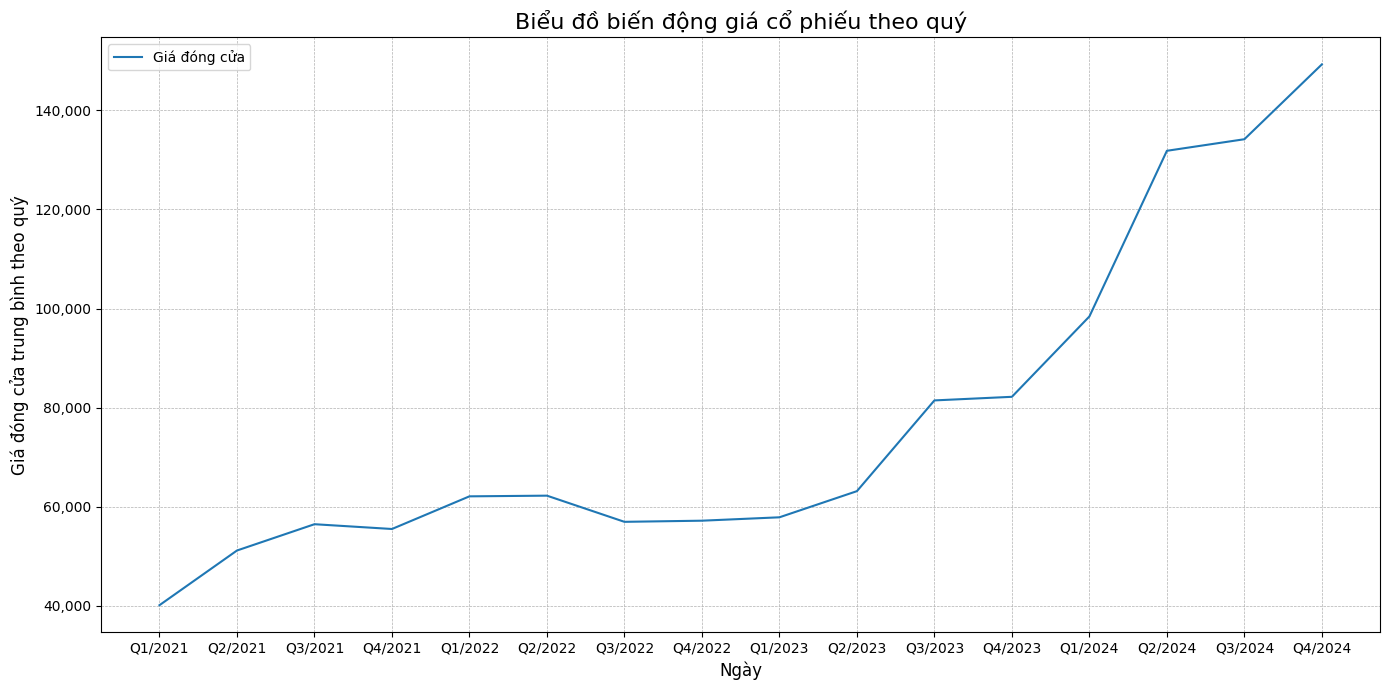

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

## Tương quan Pearson giữa các chỉ số tài chính

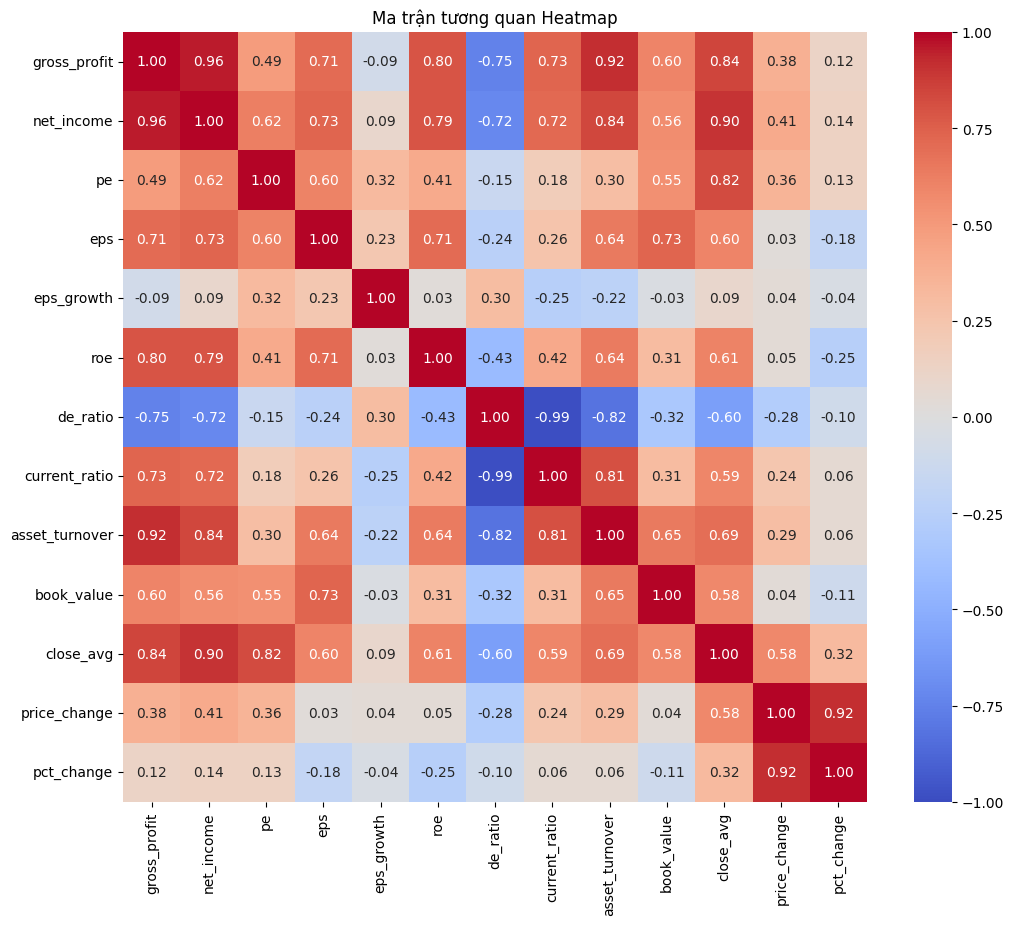

In [43]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [44]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
net_income        0.902095
gross_profit      0.844289
pe                0.822593
asset_turnover    0.689207
roe               0.608152
eps               0.597801
current_ratio     0.592545
price_change      0.584883
book_value        0.579691
pct_change        0.315548
eps_growth        0.090649
de_ratio         -0.595096
Name: close_avg, dtype: float64

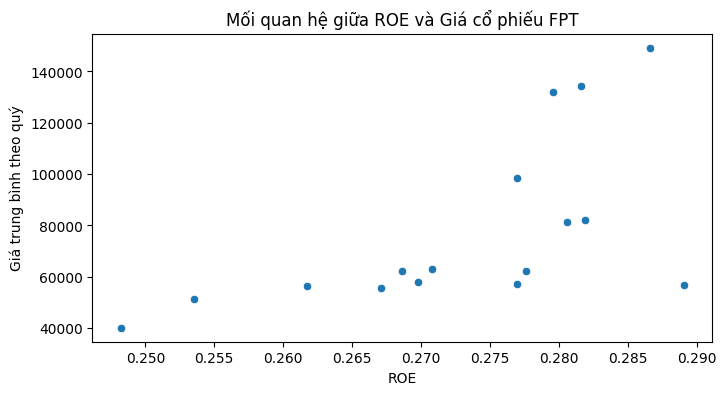

In [45]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu FPT')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()

### Diễn giải kết quả tương quan

- **Hệ số tương quan Pearson** của từng chỉ số với `close_avg` cho biết mức đồng biến tuyến tính trong giai đoạn mẫu.  
- Chỉ số có hệ số dương lớn hơn gợi ý xu hướng **đồng biến** với giá trung bình theo quý.  
- Chỉ số có hệ số âm cho thấy **nghịch biến** trong giai đoạn này.  
- **Lưu ý**: Tương quan không hàm ý quan hệ nhân quả. Cần cân nhắc độ trễ công bố báo cáo, bối cảnh vĩ mô và đặc thù ngành dịch vụ công nghệ.


## Bối cảnh doanh nghiệp FPT trong giai đoạn dữ liệu

**FPT** là tập đoàn công nghệ hàng đầu tại Việt Nam, hoạt động theo ba trụ cột chính:
1) **Dịch vụ CNTT toàn cầu** với hạt nhân là FPT Software,  
2) **Viễn thông** với FPT Telecom,  
3) **Giáo dục và đầu tư**.

**Giai đoạn 2021–2024** là quãng thời gian tăng tốc số hóa toàn cầu. Các mảng **chuyển đổi số, điện toán đám mây, dữ liệu và AI** đóng vai trò động lực tăng trưởng của doanh nghiệp dịch vụ CNTT. FPT mở rộng thị trường quốc tế, trong đó **Nhật Bản** và các thị trường phát triển duy trì nhu cầu chuyển đổi số bền vững.  
Ở trong nước, mảng **viễn thông** và **dịch vụ số** tiếp tục duy trì đà tăng trưởng ổn định. Công ty tập trung vào **sản phẩm dịch vụ giá trị gia tăng**, hạ tầng và nền tảng công nghệ.

**Liên hệ với biến động giá**  
- Những nhịp tăng giá kéo dài có thể gắn với kỳ vọng thị trường vào **kết quả kinh doanh theo quý** và **hợp đồng chuyển đổi số** ký mới.  
- Thông tin về **sáng kiến AI** và định hướng công nghệ thường là chất xúc tác tâm lý tích cực.  
- Dù vậy, biến động ngắn hạn vẫn chịu tác động từ **dòng tiền thị trường**, **tỷ giá**, **lãi suất** và bối cảnh vĩ mô.

> Ghi chú: Phần bối cảnh này chỉ nhằm kết nối dữ liệu trong phạm vi 2021–2025 của bài với hoạt động kinh doanh cốt lõi của doanh nghiệp. Khi cần kết luận định lượng, vui lòng đối chiếu trực tiếp với báo cáo tài chính và tài liệu IR cùng kỳ.


## Kết luận và hạn chế

**Kết luận**  
- Đã mô tả dữ liệu và trình bày thống kê cơ bản cho hai bảng.  
- Đã trực quan hóa biến động **giá đóng cửa theo ngày** trong giai đoạn 15/03/2021 → 14/03/2025.  
- Đã tạo **bảng theo quý** với `close_avg`, `price_change`, `pct_change` và các chỉ số tài chính.  
- Đã tính **tương quan Pearson** để gợi ý quan hệ tuyến tính giữa **giá** và **chỉ số tài chính**, làm tiền đề cho phân tích sâu hơn.

**Hạn chế**  
- Tương quan tuyến tính không phản ánh hết động lực cơ bản và không khẳng định quan hệ nhân quả.  
- Dữ liệu tài chính có **độ trễ công bố** so với biến động giá.  
- Một số chỉ số có thể khác biệt định nghĩa giữa các nguồn hoặc qua thời gian.
